In [9]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

In [10]:
def quantizeWeight(W,BW):
    Wq = np.minimum(np.round(W*np.power(2.0,BW-1.0))*np.power(2.0,1.0-BW),1.0-np.power(2.0,1.0-BW))
    return Wq

def quantizeInput(X,BX):
    return np.minimum(np.round(X*np.power(2.0,BX))*np.power(2.0,-BX) ,1.0-np.power(2.0,-BX))



In [11]:
#print(quantizeWeight(-0.4344,3))
print(quantizeInput(0.22222,10))

0.22265625


In [12]:
def generate_random_data(Nsample,NDP=128):
    X = np.random.uniform(0,1,(NDP,Nsample))
    W = np.random.uniform(-1,1,(NDP,Nsample))
    muX = np.mean(X)
    varX = np.var(X)
    muW = np.mean(W)
    varW = np.var(W)
    return X,W,muX,muW,varX,varW

def estimate_sqnr(NDP, BX, BW, muX, muW, varX, varW):
    x_rms2 = muX**2 + varX
    deltaW = np.power(2.0,1-BW)
    deltaX = np.power(2.0,-BX)
    
    sig2_y = NDP*x_rms2*varW
    sig2_qx2y = NDP*varW*np.square(deltaX)/12.0
    sig2_qw2y = NDP*x_rms2*np.square(deltaW)/12.0
    
    SNR = 10*np.log10(sig2_y/(sig2_qx2y+sig2_qw2y))
    return SNR

def evaluate_sqnr(X,W,BX,BW):
    Yt = np.sum(X*W,axis=0)
    Yq = np.sum(quantizeInput(X,BX)*quantizeWeight(W,BW),axis=0)
    SNR = 10*np.log10(np.true_divide(np.sum(np.var(Yt)),np.sum(np.var(Yt-Yq))))
    return SNR

In [13]:
Nsample = 10000
NDP = 128
BX = 6
BW = 5
X,W,muX,muW,varX,varW = generate_random_data(Nsample,NDP)
print('Predicted SQNR = %f' %estimate_sqnr(NDP,BX,BW,muX,muW,varX,varW))
print('Simulated SQNR = %f' %evaluate_sqnr(X,W,BX,BW))

Predicted SQNR = 29.840349
Simulated SQNR = 29.499459


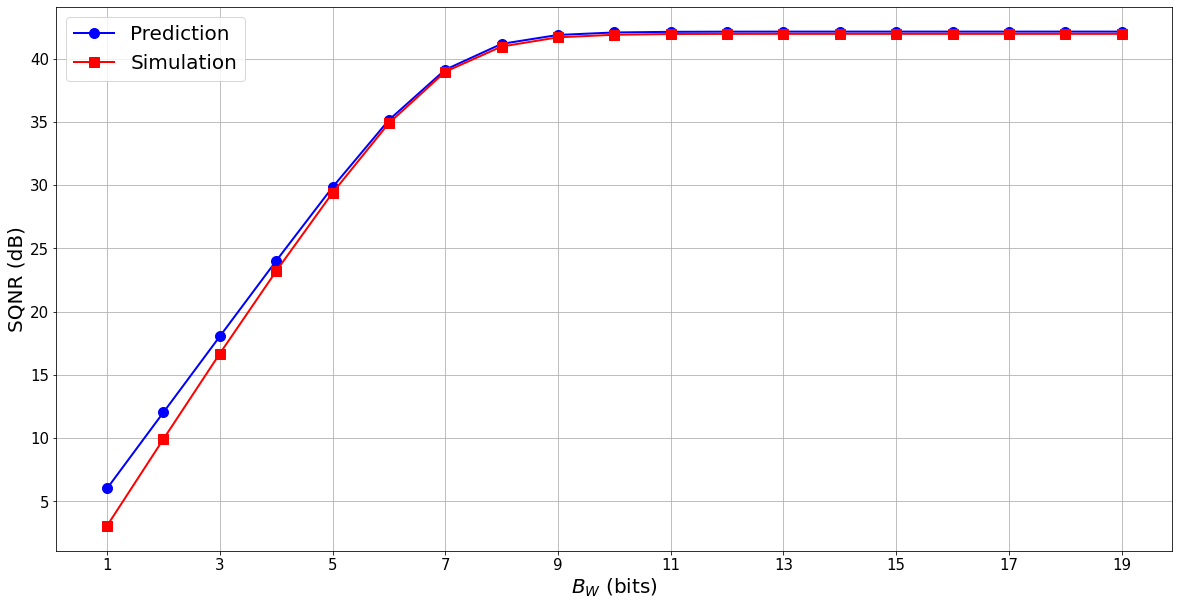

In [14]:
BWs = []
SQNR_predict = []
SQNR_eval = []
X,W,muX,muW,varX,varW = generate_random_data(Nsample,NDP)
for BW in range(1,20):
    BWs.append(BW)
    SQNR_predict.append(estimate_sqnr(NDP,BX,BW,muX,muW,varX,varW))
    SQNR_eval.append(evaluate_sqnr(X,W,BX,BW))

fig=plt.figure(figsize=(20,10))
ax=fig.add_subplot(111)
line1, = ax.plot(BWs,SQNR_predict,label='Prediction',linewidth=2,color='b',marker='o',markersize=10)
line2, = ax.plot(BWs,SQNR_eval,label='Simulation',linewidth=2,color='r',marker='s',markersize=10)
plt.legend(handles=[line1,line2],loc=0,fontsize=20)
ax.grid()
ax.set_xlabel(r'$B_W$ (bits)',fontsize=20)
ax.set_ylabel('SQNR (dB)',fontsize=20)
ax.tick_params(axis='both',labelsize=15)
ax.set_xticks(np.arange(1,20,2))
plt.show()